data input: do not necessarily need to be concluded

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython.display import Image

df = pd.read_excel('two-phase flow correlation data.xlsx')

def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True
    
all_data = df[df.columns[1:]].values
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis = 1).copy().values
X = np.array(all_data[real_rows, 1:], dtype = 'float')
y = np.array(all_data[real_rows, 0], dtype = 'float')
y = y.reshape(-1, 1)
x_names = [str(x) for x in df.columns[2:]]
y_name = df.columns[1]

print('X matrix dimensions: {}'.format(X.shape))
print('y matrix dimensions: {}'.format(y.shape))
#print(X)
#print(x_names)

X matrix dimensions: (8057, 7)
y matrix dimensions: (8057, 1)


### main part
In the following section, we will give a preview of using time-series model. Intuitively, our database: the two-phase flow correlation should not be time-dependent. However the reason we incorprate time series model here lies in: 1. the trasition state between two steady state is time-depedent, and thus we would like to see the time-dependent effect in short term; 2. make sure the design of experiment is reasonable and there is no long-term time dependency.

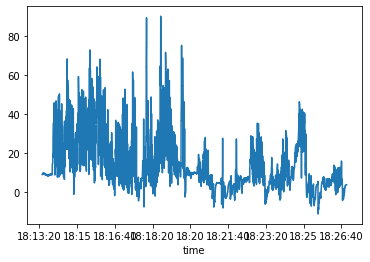

In [6]:
# data vitulization 
pd.plotting.register_matplotlib_converters()
plt.plot(df[df.columns[0]],y)

[1.         0.92644135 0.85288225 0.77932315 0.70576406 0.69353974
 0.6813155  0.66909127 0.65686703 0.65404314 0.65121926 0.64839538
 0.6455715  0.63804791 0.63052376 0.62299961 0.61547546 0.60984241
 0.60420917 0.59857593 0.59294269]


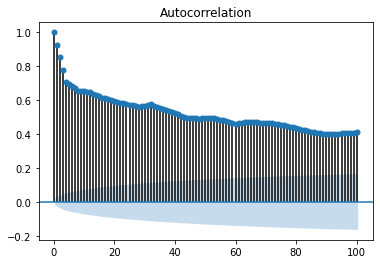

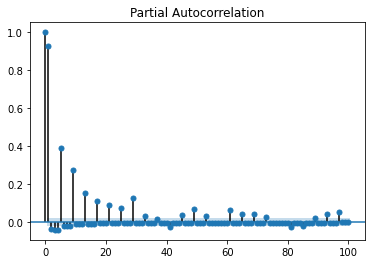

In [5]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

autocorr = acf(y, nlags = 20,fft=False)
print(autocorr)
_ = plot_acf(y, lags = 100)
_ = plot_pacf(y, lags = 100)

We see that the our dataset is actually astonishingly autocorrelated past 100 prior points, although the autocorrelation decays rapidly. The partial autocorrelation falls off quickly, with only 2 prior points having significant partial autocorrelations, and no long-term seasonal variations are visisble. This make senses because we expect the system reaches equilibrium relatively quick. Also we see some scatter data points priorer than 5 steps also have high partial correlation, this probably due to the experiment design flaw. 


Overall, this is just a sample test for the incorpration of time-series theory while more details will be potentially included in the following report.